
# Instruction

Task description and data for candidates applying to be a Data Analyst at Schibsted.

## Background

*Event logging* (EL) is used to track a variety of performance and usage metrics to help on the decision making process. Specifically, the most used metrics are:

- *clickthrough rate*: the proportion of search sessions where the user clicked on one of the results displayed
- *zero results rate*: the proportion of searches that yielded 0 results

and other metrics outside the scope of this task. EL uses JavaScript to asynchronously send messages (events) to the servers when the user has performed specific actions. In this task, you will analyze a subset of our event logs.

## Task

You must create a **reproducible report**\* answering the following questions:

1. What is the daily overall clickthrough rate? How does it vary between the groups?
2. Which results do people tend to try first? How does it change day-to-day?
3. What is the daily overall zero results rate? How does it vary between the groups?
4. Let *session length* be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.
5. Summarize your findings in an *executive summary*.

\* Given dependencies and other instructions, we should be able to re-run your source code with the dataset in the same directory and obtain the same results and figures. Popular formats for this include RMarkdown and Jupyter Notebook (formerly IPython).

## Data

Desktop users are randomly sampled to be anonymously tracked by this schema which uses a "I'm alive" pinging system that it is used to estimate how long users stay on the pages they visit. The dataset contains just a little more than a week of EL data.

| Column          | Value   | Description                                                                       |
|:----------------|:--------|:----------------------------------------------------------------------------------|
| uuid            | string  | Universally unique identifier (UUID) for backend event handling.                  |
| timestamp       | integer | The date and time (UTC) of the event, formatted as YYYYMMDDhhmmss.                |
| session_id      | string  | A unique ID identifying individual sessions.                                      |
| group           | string  | A label ("a" or "b").                                     |
| action          | string  | Identifies in which the event was created. See below.                             |
| checkin         | integer | How many seconds the page has been open for.                                      |
| page_id         | string  | A unique identifier for correlating page visits and check-ins.                    |
| n_results       | integer | Number of hits returned to the user. Only shown for searchResultPage events.      |
| result_position | integer | The position of the visited page's link on the search engine results page (SERP). |

The following are possible values for an event's action field:

- **searchResultPage**: when a new search is performed and the user is shown a SERP.
- **visitPage**: when the user clicks a link in the results.
- **checkin**: when the user has remained on the page for a pre-specified amount of time.

### Example Session

|uuid                             |      timestamp|session_id       |group |action           | checkin|page_id          | n_results| result_position|
|:--------------------------------|:--------------|:----------------|:-----|:----------------|-------:|:----------------|---------:|---------------:|
|4f699f344515554a9371fe4ecb5b9ebc | 20160305195246|001e61b5477f5efc |b     |searchResultPage |      NA|1b341d0ab80eb77e |         7|              NA|
|759d1dc9966353c2a36846a61125f286 | 20160305195302|001e61b5477f5efc |b     |visitPage        |      NA|5a6a1f75124cbf03 |        NA|               1|
|77efd5a00a5053c4a713fbe5a48dbac4 | 20160305195312|001e61b5477f5efc |b     |checkin          |      10|5a6a1f75124cbf03 |        NA|               1|
|42420284ad895ec4bcb1f000b949dd5e | 20160305195322|001e61b5477f5efc |b     |checkin          |      20|5a6a1f75124cbf03 |        NA|               1|
|8ffd82c27a355a56882b5860993bd308 | 20160305195332|001e61b5477f5efc |b     |checkin          |      30|5a6a1f75124cbf03 |        NA|               1|
|2988d11968b25b29add3a851bec2fe02 | 20160305195342|001e61b5477f5efc |b     |checkin          |      40|5a6a1f75124cbf03 |        NA|               1|

This user's search query returned 7 results, they clicked on the first result, and stayed on the page between 40 and 50 seconds. (The next check-in would have happened at 50s.)

Task 100% inspired by this one -> https://github.com/wikimedia-research/Discovery-Hiring-Analyst-2016

# Targets:

**Task1/Click-through rate (CTR)**: count of first visited pages per all of the searches (the bigger the better)

**Task 2**: The histogram of result_positions if action=visitPage  

**Task3/Zero results rate (ZRR)**: count of searches yielded zero per all of the searches(the smaller the better)

**Task 4**: Define a new table probably and try to find an insight

**Find any other insights + writing an executive summary

In [47]:
# Import all the libs here

import pandas as pd									# data manipulation
import matplotlib.pyplot as plt						# graphs
import seaborn as sns								# graphs
import numpy as np									# graphs
from matplotlib import cm							# graphs
import sys											# system functions
import warnings										# indicating warnings
warnings.filterwarnings('ignore')					# ignore by default
from matplotlib.ticker import LinearLocator			# graphs
pd.set_option('display.max_columns', None)			# show all columns
pd.set_option('display.max_rows', 200)				# show all rows
np.set_printoptions(threshold=sys.maxsize)			# show arrays full
pd.set_option("display.max_colwidth", -1)			# show a complete text in a cell
from xlsxwriter.workbook import Workbook			# CSV writing
import csv											# CSV writing
import datetime										# time conversions
import random										# randomchoice
import sklearn										# mutual information
from sklearn.ensemble import RandomForestClassifier	# random forest
from sklearn import linear_model					# linear regression

In [2]:
# Read CSV

df = pd.read_csv('df.csv')

# 1- Data Profiling and Exploratory Analysis

The purpose is to see what's going on inside of our table

In [613]:
# I used the following commands to get to know with data.
# I will delete the output to make the notebook neater and simpler.

# df.head(50)						# show 50 first rows 
# df.sample(50)						# show 50 sample rows
# df.tail(50)						# show 50 last rows

In [3]:
# type and non-values and columns described

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400165 entries, 0 to 400164
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uuid             400165 non-null  object 
 1   timestamp        400165 non-null  float64
 2   session_id       400165 non-null  object 
 3   group            400165 non-null  object 
 4   action           400165 non-null  object 
 5   checkin          223824 non-null  float64
 6   page_id          400165 non-null  object 
 7   n_results        136234 non-null  float64
 8   result_position  230482 non-null  float64
dtypes: float64(4), object(5)
memory usage: 27.5+ MB


In [4]:
# statistics insights

df.describe()

,timestamp,checkin,n_results,result_position
count,4.001650e+05,223824.000000,136234.000000,230482.000000
mean,2.016030e+13,97.190382,13.210109,2.992798
std,2.340996e+06,104.593714,13.271104,38.557292
min,2.016030e+13,10.000000,0.000000,1.000000
25%,2.016030e+13,20.000000,2.000000,1.000000
50%,2.016030e+13,50.000000,20.000000,1.000000
75%,2.016031e+13,150.000000,20.000000,2.000000
max,2.016031e+13,420.000000,500.000000,4103.000000


In [5]:
# UUID has generated randomly and assigned to each event so we don't need it.

df.drop(columns=['uuid'], inplace=True)

In [6]:
# Let's convert a time stamp to a datatype

df['timestamp'] = pd.to_datetime(df['timestamp'].astype(str).str[:14])

In [7]:
# We are dealing with many sessions which lies on a sequence so we need to sort it. The reason is that we can make good use of 
# table content + sequential indexes for further analysis.

df = df.sort_values(['session_id', 'timestamp'])

In [8]:
# indexes must be sorted as well.

df = df.reset_index(drop=True)

In [9]:
df['session_id'].value_counts(dropna=False, ascending=False)

# It seems some users had more interactions compare to others

b254341e78af2f1a    484
593638dbb24d903a    305
549c7d24637bc68c    250
4264985570c2b41d    234
b1b9ad0b289027e1    223
                   ... 
223ede42072bb862    1  
0d7ec49874d59263    1  
54a93a7eac6ea0b3    1  
9182fc3c69f6cc43    1  
415bf62c55c9390d    1  
Name: session_id, Length: 68028, dtype: int64

A: 74.7%
B: 25.3%


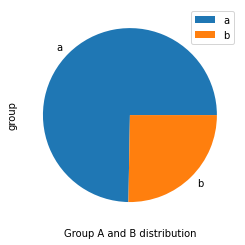

In [10]:
df['group'].value_counts().plot(kind='pie')
plt.xlabel('Group A and B distribution')
plt.legend(loc='upper right')
print('A: ',round(df['group'].value_counts(normalize=True)*100, 1)[0],'%', sep = '')
print('B: ',round(df['group'].value_counts(normalize=True)*100, 1)[1],'%', sep = '')

# Does it mean the user interaction in group A is higher? Or just a higher incidents? Is it sensible that the traffic
# was not distributed evenly or nearly even? We'll see!

In [623]:
# Let's see if traffic for our variates A and B test was distributed evenly by filtering each session and counting 
# the number of unique A and B

user = int(input ('Specify the number of sampling: '))               # Suggestion: 3
k = int(input ('Specify the \"K\" parameter for random choice: '))   # Suggestion: 1000
for sample in range(1, user+1):
    
    group_counts = pd.DataFrame(data={'Variate':['']}, columns=['Variate'])
    search = random.choices(df['session_id'].unique(), k=k)
    index = 0
    for session_id in search:
        group_counts.at[index, 'Variate'] = df.loc[df['session_id'] == session_id]['group'].unique().sum()
        index = index + 1
    
    print('Sample',sample, ':', 'variate b =', round(group_counts['Variate'].value_counts(normalize=True)*100, 1)['b'],'%',
          'and',' variate a =', round(group_counts['Variate'].value_counts(normalize=True)*100, 1)['a'],'%')


Specify the number of sampling: 5
Specify the "K" parameter for random choice: 1000
Sample 1 : variate b = 60.5 % and  variate a = 39.5 %
Sample 2 : variate b = 59.2 % and  variate a = 40.8 %
Sample 3 : variate b = 57.4 % and  variate a = 42.6 %
Sample 4 : variate b = 55.7 % and  variate a = 44.3 %
Sample 5 : variate b = 59.8 % and  variate a = 40.2 %


In fact, traffic was passed to variate B a little bit more than A. But quite close to each other.

Based on the above investigation, now we know that even though B traffic is higher than A (probably 58% to 42%), but the user interaction in case of A is higher ( due to the higher number of events in total). A variate absorbed more user interaction than B despite getting less traffic.

In [11]:
# Next feature is action.

df['action'].value_counts(dropna=False, ascending=False)

checkin             223824
searchResultPage    136234
visitPage           40107 
Name: action, dtype: int64

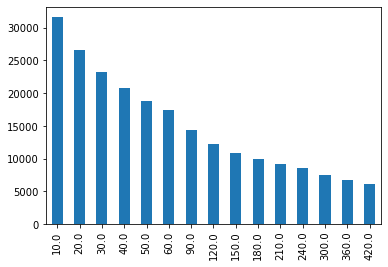

In [12]:
# Let's visualize the next feature!

df['checkin'].value_counts(dropna=True, ascending=False).plot(kind='bar');

# Inside of 420 is also other times (360,300,...) So it seems obvious that we receive a nice curve diagram!

In [13]:
df['page_id'].value_counts(dropna=False, ascending=False)

# Anything special? some pages absorbed more interaction which means user had more checkin time

ffeae9d12ad83b25    24
5776ccc6144ff777    20
6ea77e97a39691d2    19
6151bd29e99dae15    19
e6fcfc833df5c687    19
                    ..
983c8e8714a7f885    1 
85875c1871477245    1 
fc350d4c5f613478    1 
40c17aa9cc3242e5    1 
384d4bf4e11de124    1 
Name: page_id, Length: 176371, dtype: int64

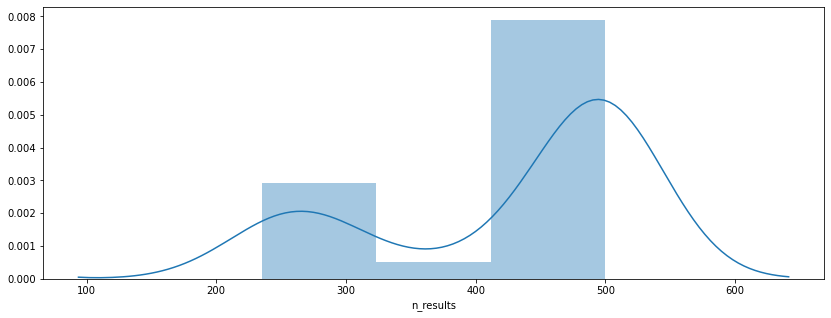

In [14]:
# Histogram of search results for results more than 200 shows that it is not a normal distribution.

fig, ax = plt.subplots(figsize=(14, 5))
sns.distplot(df.loc[df['n_results'] > 200]['n_results']);

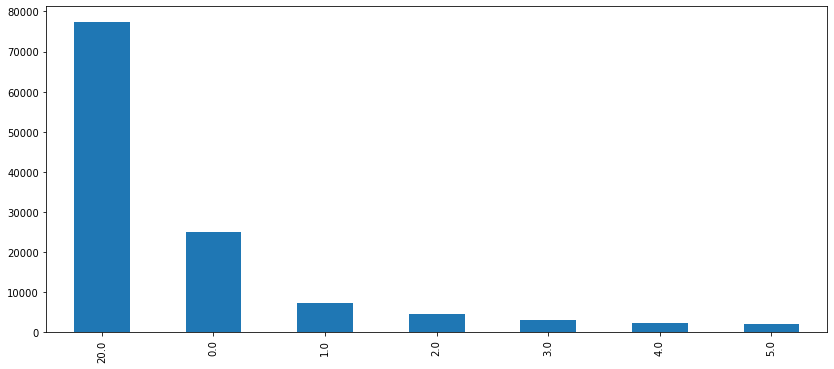

In [15]:
# Here we have the top 7 highest frequency of variable n_results. I assume 20 is the normal number of result in each page.
# unfortunetly, we have lots of 0s which manifests itself later in ZRR index.

df['n_results'].value_counts().loc[lambda x : x>2000].plot(kind='bar', figsize=(14,6), xlim=(0,10));

In [16]:
# Wow! it seems the majority of visitors love the first result! Isn't that the answer of Task2?!

df['result_position'].value_counts(dropna=False, ascending=False)

NaN       169683
1.0       149354
2.0       31779 
3.0       16234 
4.0       8698  
5.0       5334  
6.0       3943  
7.0       2833  
8.0       1775  
10.0      1396  
9.0       1380  
12.0      1009  
11.0      934   
13.0      867   
14.0      676   
19.0      592   
20.0      542   
16.0      511   
15.0      492   
18.0      475   
17.0      412   
21.0      72    
34.0      55    
22.0      47    
32.0      38    
29.0      38    
25.0      32    
83.0      28    
30.0      26    
38.0      26    
28.0      26    
50.0      26    
55.0      25    
71.0      25    
36.0      24    
49.0      22    
24.0      20    
31.0      19    
23.0      19    
41.0      19    
61.0      18    
43.0      17    
76.0      17    
26.0      16    
94.0      16    
73.0      16    
42.0      15    
141.0     14    
59.0      14    
163.0     14    
40.0      13    
166.0     13    
66.0      13    
33.0      12    
62.0      11    
169.0     11    
70.0      11    
63.0      11    
469.0     11  

# 2- Data Validation

In [17]:
# Hypothesis1 (searchResultPage): According to the instruction, when action is searchResultPage, checkin and result_position
# must be zero. Besides, n_results can't be null. So, let's evaluate that hypothesis

dfh1 = df.loc[df['action'] == 'searchResultPage']

In [18]:
dfh1['checkin'].sum() + dfh1['result_position'].sum()

0.0

In [19]:
dfh1['n_results'].isnull().any()

# Seems we have no error here.

False

In [20]:
# Hypothesis2 (visitPage): when action is visitPage, the checkin column is a number. But, it seems when action is 
# visitPage, result_position sometimes has a value and sometimes not. Is there any pattern behind that?

df.loc[(df['action'] == 'visitPage') & (df['result_position'].isnull())]

# Looking through session_id:0007b7f6b575feb6 as a random chice, it is clear that when the second click in the same SERP occurs,
# Java wouldn't return the search position.
# We can use this finding when subsequently we define CTR.

,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
51,2016-03-03 16:57:04,0007b7f6b575feb6,a,visitPage,NaN,cd0830379a43b008,NaN,NaN
52,2016-03-03 16:57:06,0007b7f6b575feb6,a,visitPage,NaN,2cfc3647b762a0e6,NaN,NaN
240,2016-03-01 06:55:22,0024c4506bf92e1c,a,visitPage,NaN,ffd856e8e1e4bea8,NaN,NaN
329,2016-03-02 07:17:37,00317ffe60c93021,a,visitPage,NaN,edc17d5f9a082e37,NaN,NaN
333,2016-03-02 07:18:09,00317ffe60c93021,a,visitPage,NaN,3ed5e3ae70472ad0,NaN,NaN
...,...,...,...,...,...,...,...,...
399609,2016-03-02 07:05:32,ff90affc266b84f4,a,visitPage,NaN,4efc207cf1e9725f,NaN,NaN
399616,2016-03-02 07:06:41,ff90affc266b84f4,a,visitPage,NaN,8551c4a78bb04f47,NaN,NaN
399622,2016-03-02 07:07:38,ff90affc266b84f4,a,visitPage,NaN,c31e6b7eeb42d465,NaN,NaN
399914,2016-03-03 04:14:37,ffd88039c4b94be2,a,visitPage,NaN,3e474cf6fee9429f,NaN,NaN


In [21]:
# 6000 or so rows can't be a mistake. There must be a pattern behind that. Incidentally, let's see how many nun values exist

total = df.isnull().sum().sort_values(ascending=False)
percent = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100, 1)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Nulls', 'Percent'])
missing_data.head(3)

# We have a lot of null values but there is no problem for analyzing because not all values associated with all features.
# In that case, we can try pivot and unpivot to change the structure of data.
# Yet, I prefer to move forward with the same structure

,Total Nulls,Percent
n_results,263931,66.0
checkin,176341,44.1
result_position,169683,42.4


In [22]:
# Dealing with null values: 
# 1- n_results: According to hypothesis 1 and 2, n_results is always is.null in case of (action = Checkin
# | visitPage), and always not.null in case of SERP. Let's see if it's correct:

df.loc[(df['n_results'].isnull())].shape[0] == (
df.loc[(df['action'] == 'visitPage')].shape[0] + df.loc[(df['action'] == 'checkin')].shape[0])

# True. Thus, we're not ganna take any furthur action.

True

In [23]:
# 2- checkin: is null in case of (action = SERP | visitPage) beacuase it is about how much time the user has passed so only
# related to action=checkin. Let's check it:

df.loc[(df['checkin'].isnull())].shape[0] == (
df.loc[(df['action'] == 'visitPage')].shape[0] + df.loc[(df['action'] == 'searchResultPage')].shape[0])

# True. Thus, we're not ganna take any furthur action.

True

In [24]:
# 3- result_position:
# A: must be null in case of action=searchResultPage

df.loc[df['action'] == 'searchResultPage']['result_position'].value_counts(dropna=False, ascending=False)

# Based on the task description

NaN    136234
Name: result_position, dtype: int64

In [25]:
# 3- result_position:
# B: 1- when check_in, n_results, and result_position all are null then action must be visitPage which denotes the second click 
# at the same query page.

df.loc[(df['checkin'].isnull()) & (df['n_results'].isnull()) & (df['result_position'].isnull())]['action'].value_counts(dropna=False, ascending=False)

# 6028 visits are in fact second-onwards clicks in the same query page.

visitPage    6028
Name: action, dtype: int64

In [26]:
# 3- result_position:
# B: 2- Also when checkin.notnull & (n_results & result_position).isnull, then action must be checkin:

df.loc[(df['checkin'].notnull()) & ((df['n_results'].isnull()) & (df['result_position'].isnull()))]['action'].value_counts(dropna=False, ascending=False)

# In the end, we do not do anything with our null values

checkin    27421
Name: action, dtype: int64

In [27]:
# Outliers: We have 1 discrete and 2 continious numeric values

df['checkin'].value_counts().sort_index(ascending=False).sort_values(ascending=False) 

# It seems many users sepnd so much time interacting with the website.

10.0     31652
20.0     26546
30.0     23218
40.0     20792
50.0     18857
60.0     17369
90.0     14319
120.0    12287
150.0    10875
180.0    9894 
210.0    9137 
240.0    8504 
300.0    7458 
360.0    6738 
420.0    6178 
Name: checkin, dtype: int64

In [28]:
df['n_results'].value_counts().sort_index(ascending=True)

# Results above 20 decreases in number significantly.
# We will not drop anthing at the time being. When the analysis table has been generated, I will check outliers again.

0.0      25127
1.0      7457 
2.0      4612 
3.0      3208 
4.0      2410 
5.0      2051 
6.0      1696 
7.0      1468 
8.0      1288 
9.0      1155 
10.0     964  
11.0     1010 
12.0     896  
13.0     813  
14.0     772  
15.0     722  
16.0     671  
17.0     680  
18.0     676  
19.0     738  
20.0     77411
21.0     4    
22.0     8    
23.0     3    
24.0     1    
25.0     2    
27.0     1    
28.0     1    
29.0     4    
30.0     4    
31.0     3    
32.0     4    
33.0     2    
34.0     2    
35.0     3    
36.0     4    
37.0     3    
39.0     9    
40.0     1    
43.0     1    
44.0     1    
45.0     1    
47.0     7    
50.0     51   
57.0     1    
58.0     16   
59.0     1    
61.0     1    
63.0     1    
64.0     1    
66.0     84   
67.0     1    
77.0     2    
78.0     33   
80.0     2    
81.0     1    
92.0     1    
97.0     1    
99.0     1    
100.0    42   
102.0    1    
105.0    1    
106.0    2    
108.0    2    
109.0    6    
112.0    2    
114.0    2

In [29]:
df['result_position'].value_counts().sort_index(ascending=True)

# No one visits the middle pages!

1.0       149354
2.0       31779 
3.0       16234 
4.0       8698  
5.0       5334  
6.0       3943  
7.0       2833  
8.0       1775  
9.0       1380  
10.0      1396  
11.0      934   
12.0      1009  
13.0      867   
14.0      676   
15.0      492   
16.0      511   
17.0      412   
18.0      475   
19.0      592   
20.0      542   
21.0      72    
22.0      47    
23.0      19    
24.0      20    
25.0      32    
26.0      16    
27.0      10    
28.0      26    
29.0      38    
30.0      26    
31.0      19    
32.0      38    
33.0      12    
34.0      55    
35.0      8     
36.0      24    
37.0      4     
38.0      26    
39.0      1     
40.0      13    
41.0      19    
42.0      15    
43.0      17    
44.0      3     
46.0      4     
47.0      3     
48.0      7     
49.0      22    
50.0      26    
51.0      10    
52.0      4     
54.0      4     
55.0      25    
56.0      5     
57.0      6     
58.0      9     
59.0      14    
60.0      2     
61.0      18  

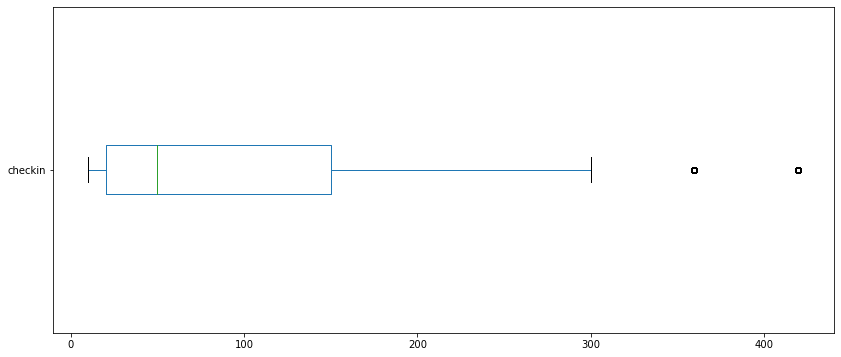

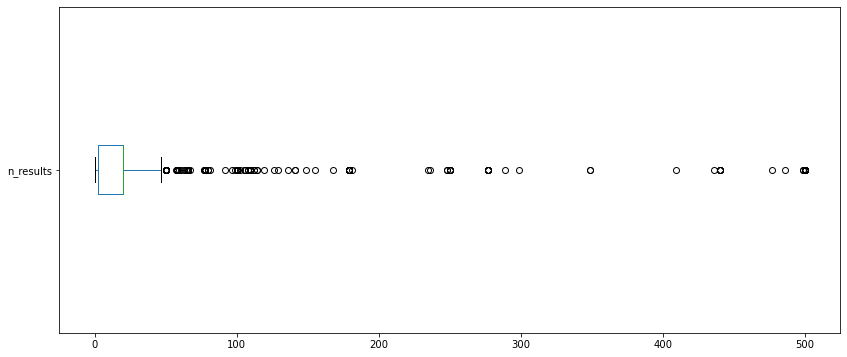

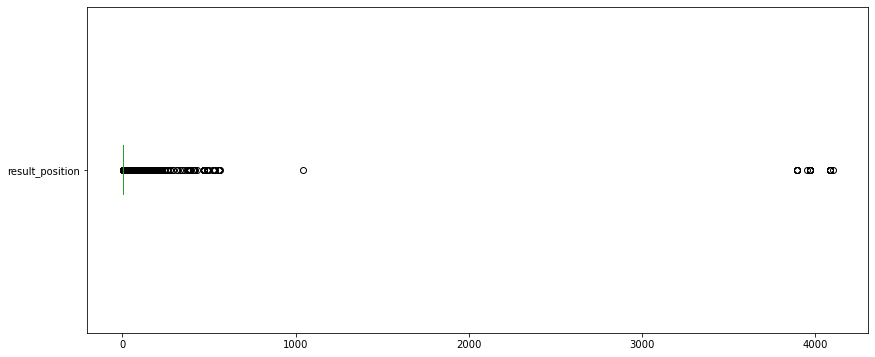

In [30]:
# Boxplot is one of the best way to visually identify the outliers.

df['checkin'].plot(kind='box', vert=False, figsize=(14,6));
plt.show()
df['n_results'].plot(kind='box', vert=False, figsize=(14,6));
plt.show()
df['result_position'].plot(kind='box', vert=False, figsize=(14,6));
plt.show()

Regarding the above insights and contemplating at the data, we may need to clean data based on 4 hypothesis which you can see the elaborated version of that. Also, some of the session lengths, which will be genrated later, have appeard to be prolonged for hours and even days which needs furthur attention. However, I will deal with them and any possible outliers or abnormality after having had the analysis table generated.

**Caution**: Executing the following codes may take up to 90 minutes.
In that case, I will provide a saved version of edited files in the 'generated' folder so that you can read that.

In [607]:
# Hypothesis 3: all the session_ids should have an observation including action=searchResultPage
# Hypothesis 4: now let's check if a session_id has a checkin time but doesn't have a action=visitPage
# Hypothesis 5: the first appearance of visitpage must indicate a number in result_position
# Hypothesis 6: Visited link position from query cannot be greater than the number of searches generated in one index before.

index=0
for session_id in df['session_id'].unique()[1:]:
    
    #H3
    if (df.loc[(df['session_id'] == session_id)]['action'] == 'searchResultPage').sum() == 0 :
        print('H3: Session ',session_id, ' has no searchResultPage')
        df.drop(df.loc[df['session_id'] == session_id].index, inplace=True)
    
    #H4
    elif (df.loc[(df['session_id'] == session_id)]['checkin'].sum() > 0) & ((df.loc[(df['session_id'] == session_id)]['action'] == 'visitPage').sum() == 0):
        print('H4: Session ',session_id, ' has no visitPage despite having checkin')
        df.drop(df.loc[df['session_id'] == session_id].index, inplace=True)
    
    #H5
    elif ((df.loc[(df['session_id'] == session_id) & (df['action'] == 'visitPage')]).head(1)['result_position'].isnull().sum() == 1) == True:
        print('H5: Session ',session_id, ' no indicating a number in result_position for first visitPage ')
        df.drop(df.loc[df['session_id'] == session_id].index, inplace=True)
    
    #H6
    elif (df.loc[df['session_id'] == session_id]['action'] == 'visitPage').sum() > 0:
        if df.loc[(df['session_id'] == session_id) & ((df['action'] == 'visitPage' ) & (df['result_position'].notnull()))].head(1)['result_position'].sum() > df.loc[df.loc[(df['session_id'] == session_id) & ((df['action'] == 'visitPage' ) & (df['result_position'].notnull()))].head(1).index[0]-1,'n_results']:    
            print('H6: In session ',session_id, ', user has clicked on a query link greater than the number of query results')
            df.drop(df.loc[df['session_id'] == session_id].index, inplace=True)
        
index= index + 1   

# The ouput(session_id(s)) were randomly checked by R Markdown at the time it was being executed to ensure the viability
# and correctness of the code.

H6: In session  012460df6605630a , user has clicked on a query link greater than the number of query results
H3: Session  02c84fec821e9425  has no searchResultPage
H3: Session  047d34f72f1f85f3  has no searchResultPage
H4: Session  047efe2c6f738e34  has no visitPage despite having checkin
H6: In session  0705f6124671c837 , user has clicked on a query link greater than the number of query results
H6: In session  07d1244fb0ecfa18 , user has clicked on a query link greater than the number of query results
H6: In session  0d050fd8343f9ab7 , user has clicked on a query link greater than the number of query results
H3: Session  0d23d7759b20b298  has no searchResultPage
H6: In session  0d6eb81512d879e9 , user has clicked on a query link greater than the number of query results
H6: In session  0ec436cce82cfca8 , user has clicked on a query link greater than the number of query results
H3: Session  1102ddf0e256b2bc  has no searchResultPage
H6: In session  114e3fa48cc98264 , user has clicked on 

H6: In session  8f50a4481d0233cc , user has clicked on a query link greater than the number of query results
H4: Session  905f8682b6525bca  has no visitPage despite having checkin
H3: Session  943517f6fcd5215f  has no searchResultPage
H3: Session  943e0238a8f06402  has no searchResultPage
H6: In session  98b20cee56346b8c , user has clicked on a query link greater than the number of query results
H3: Session  9a6c5d8feebc2fcb  has no searchResultPage
H3: Session  9e4d1f308be252b1  has no searchResultPage
H3: Session  9ff940fcebe3d7d2  has no searchResultPage
H3: Session  a24fab6b92cc34d1  has no searchResultPage
H4: Session  a3ea33a6b553f5b4  has no visitPage despite having checkin
H3: Session  a402d35577e2c8c6  has no searchResultPage
H4: Session  a46aa30fb115dda9  has no visitPage despite having checkin
H3: Session  a4f355f2f5afb218  has no searchResultPage
H3: Session  a78453621939272e  has no searchResultPage
H3: Session  a884beb2694f5f40  has no searchResultPage
H4: Session  a913d7

In [608]:
# Please do not run this code

# df.to_csv('dfgenerated1.csv', index=None)

In [31]:
# Read from the hard if you haven't executed previous code(hypothesis) completely.

df = pd.read_csv('dfgenerated1.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [32]:
df.shape[0]

# initial shape: 400165
# after dropping: 397537
# 400165 - 397537 = 2628 observations in total were deleted, around 0.6%

397537

# 3- Feature Engineering

***It is not mandatory creating the analysis table to answer any of the above tasks. I just wanted to examine the possibility of new insights***

**Caution**: Executing the following codes may take up to 4 hours.
In that case, I will provide a saved version of edited files in the 'generated' folder so that you can read that.

In [706]:
# Result table for addressing tasks and furthur analysis:

# ---------------------------------------
# SessionLength:    max - min of the events from the same session_id. Note: We can add a 5 seconds to estimate better 
# VisitPageTotal:   count of total pages visited per each session_id
# CheckInTimeTotal: time spent by user to visit visited pages. Note: we do not consider visitPages without checkin time
# SERPTotal:        total number of results generated by search engine
# FirstClick:       number of first visited pages from each query
# ZeroSearch:       count of incidents of searches yoielded zero
# QueryTotal:       count of searches
# CTR:              FirstClick divided by QueryTotal
# ZRR:              ZeroSearch divided by QueryTotal
# ---------------------------------------

dfresult = pd.DataFrame(data={'SessionId':[''],'Day':[''],'WeekDay':[''],'SessionLength':[''],'Group':[''],'VisitPageTotal':[''],
'CheckInTimeTotal':[''],'SERPTotal':[''], 'FirstClick':[''],'ZeroSearch':[''],'QueryTotal':[''],'CTR':[''],'ZRR':['']},
columns=['SessionId','Day','WeekDay','SessionLength','Group','VisitPageTotal','CheckInTimeTotal','SERPTotal','FirstClick','ZeroSearch','QueryTotal','CTR','ZRR'])

index = 0

for session_id in df['session_id'].unique():
    
    dfresult.at[index, 'SessionId'] = session_id
    
    dfresult.at[index, 'Day'] = df.loc[df['session_id'] == session_id]['timestamp'].head(1).dt.day.sum()
    
    dfresult.at[index, 'WeekDay'] = df.loc[df['session_id'] == session_id]['timestamp'].head(1).dt.day_name().sum()
     
    dfresult.at[index, 'SessionLength'] = max(df.loc[df['session_id'] == session_id]['timestamp']) - min(df.loc[df['session_id'] == session_id]['timestamp'])
    
    dfresult.at[index, 'Group'] = df.loc[df['session_id'] == session_id]['group'].unique().sum()
    
    dfresult.at[index, 'VisitPageTotal'] = df.loc[(df['session_id'] == session_id) & (df['action'] == 'visitPage')].shape[0]
    
    checkinarray = df.loc[(df['session_id'] == session_id) & (df['checkin'].notnull())]['page_id'].unique()
    i=0
    a = [0] * 200
    for checkinarray in checkinarray:   
        a[i] = max(df.loc[((df['session_id'] == session_id) & (df['checkin'].notnull())) & (df['page_id'] == checkinarray)]['checkin'])
        i= i+1
    dfresult.at[index, 'CheckInTimeTotal'] = sum(a)
    
    dfresult.at[index, 'SERPTotal'] = df.loc[df['session_id'] == session_id]['n_results'].sum()
    
    dfresult.at[index, 'FirstClick'] = n_first_visitedpage = df.loc[((df['session_id'] == session_id) & (df['action'] == 'visitPage')) & (df['result_position'].notnull())].shape[0]
    
    dfresult.at[index, 'ZeroSearch'] = zero_results = df.loc[(df['session_id'] == session_id) & (df['n_results'] == 0)].shape[0]
    
    dfresult.at[index, 'QueryTotal'] = n_searches = df.loc[(df['session_id'] == session_id) & (df['action'] == 'searchResultPage')].shape[0]
    
    dfresult.at[index, 'CTR'] = round((n_first_visitedpage / n_searches), 2)
    
    dfresult.at[index, 'ZRR'] = round((zero_results / n_searches), 2)
    
    index = index + 1
    
    
length = pd.to_datetime(dfresult['SessionLength'].astype(str).str[7:])
dfresult['SessionLength'] = (dfresult['SessionLength'].astype(str).str[:1].astype(int))*86400 + (length.dt.hour)*3600 + (length.dt.minute)*60 + (length.dt.second)

dfresult
    

,SessionId,Day,WeekDay,SessionLength,Group,VisitPageTotal,CheckInTimeTotal,SERPTotal,FirstClick,ZeroSearch,QueryTotal,CTR,ZRR
0,0000cbcb67c19c45,3,Thursday,0,b,0,0,20,0,0,1,0,0
1,0001382e027b2ea4,7,Monday,303,b,1,300,18,1,0,1,1,0
2,0001e8bb90445cb2,5,Saturday,435,b,1,420,20,1,0,1,1,0
3,000216cf18ae1ab1,8,Tuesday,58,a,0,0,120,0,0,6,0,0
4,000527f711d50dfc,8,Tuesday,0,b,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67845,fffa5a2bcaf090c4,3,Thursday,0,b,0,0,0,0,1,1,0,1
67846,fffa88acebf831c8,4,Friday,446,a,2,420,80,2,0,4,0.5,0
67847,fffac2c4111308d0,8,Tuesday,0,b,0,0,20,0,0,1,0,0
67848,fffb978cc690214c,1,Tuesday,176,b,1,150,40,1,0,2,0.5,0


In [707]:
# Please do not run this code

# dfresult.to_csv('dfgenerated2.csv', index=None)

In [33]:
# Read from the hard if you haven't executed previous code(Feature engineering) completely.

dfresult = pd.read_csv('dfgenerated2.csv')

# 4- Data mining & answering the tasks

VisitPageTotal:
34794    51
47237    47
30828    43
44727    39
19709    33
63492    31
41029    30
43908    26
46705    26
33203    25
Name: VisitPageTotal, dtype: int64



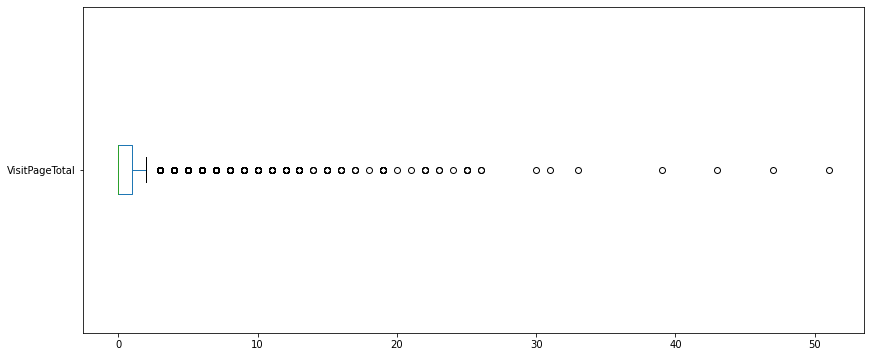

CheckInTimeTotal:
52031    2310.0
32841    2190.0
18375    2100.0
4133     1970.0
6239     1890.0
30828    1730.0
19724    1700.0
55008    1680.0
54406    1650.0
58770    1620.0
Name: CheckInTimeTotal, dtype: float64



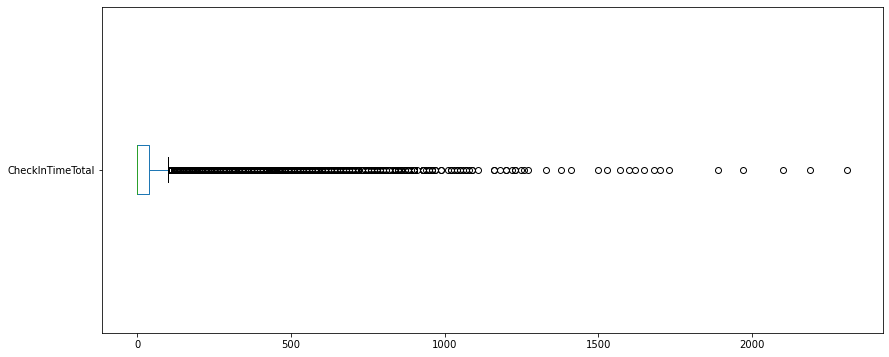

SERPTotal:
19298    3493.0
13599    3205.0
23660    1891.0
21087    1797.0
26636    1780.0
23932    1706.0
9540     1540.0
20281    1445.0
31529    1406.0
66653    1277.0
Name: SERPTotal, dtype: float64



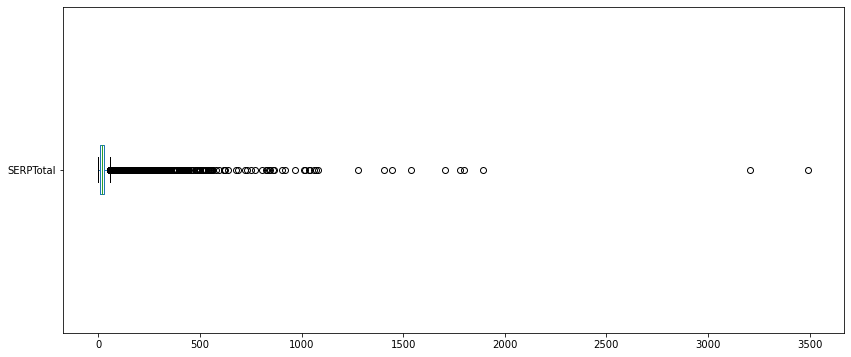

In [35]:
# We need to have a look at our new table and probably clean some data that we were not be able to detect during last cleaning

# ------------------------------------------------------------------------------------------------------------
#1 Technically CTR and ZRR must be a number between 0 to 1. Anything else will be dropped.
#2 I will consier a threshhold for a browsing time, let's say 2 hours. Anything more than that must be deleted.
#3 We should check if we have day and weekday are associated correctly
#4 Outliers of 3 columns (visitpage, CheckIn, and SERP) must be deleted to make the data more uniform.
#5 checkintime > sessionlength
# -------------------------------------------------------------------------------------------------------------

class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   END = '\033[0m'

#1:
dfresult = dfresult.drop(dfresult.loc[(dfresult['CTR'] > 1) | (dfresult['ZRR'] > 1)].index)
#2:
dfresult = dfresult.drop(dfresult.loc[dfresult['SessionLength'] > 7200].index)
#3:
for day in dfresult['Day'].unique():
    dfresult.at[dfresult[dfresult['Day'] == day].index, 'WeekDay'] = dfresult[dfresult['Day'] == day]['WeekDay'].mode().sum()
#4:(show stage)
print(color.BOLD,'VisitPageTotal:\n',color.END,dfresult.sort_values(by = 'VisitPageTotal', ascending = False)['VisitPageTotal'][:10],'\n',sep = '')
dfresult['VisitPageTotal'].plot(kind='box', vert=False, figsize=(14,6));
plt.show()

print(color.BOLD,'CheckInTimeTotal:\n',color.END,dfresult.sort_values(by = 'CheckInTimeTotal', ascending = False)['CheckInTimeTotal'][:10],'\n',sep = '')
dfresult['CheckInTimeTotal'].plot(kind='box', vert=False, figsize=(14,6));
plt.show()

print(color.BOLD,'SERPTotal:\n',color.END,dfresult.sort_values(by = 'SERPTotal', ascending = False)['SERPTotal'][:10],'\n',sep = '')
dfresult['SERPTotal'].plot(kind='box', vert=False, figsize=(14,6));
plt.show()
#5:
check = (dfresult['CheckInTimeTotal'] > dfresult['SessionLength'])
for i in dfresult.index.unique():
    if (check[i] == True):
        dfresult.drop(i, inplace=True)

In [36]:
#4 (drop stage)
dfresult.drop(dfresult.loc[dfresult['SERPTotal'] == 3493].index, inplace=True)
dfresult.drop(dfresult.loc[dfresult['SERPTotal'] == 3205].index, inplace=True)

In [37]:
# Task 1: What is the daily overall clickthrough rate? How does it vary between the groups?
# Task 3: What is the daily overall zero results rate? How does it vary between the groups?

# Using the new table generated, it is quite easy to calculate CTR and ZRR and its realtion with days and groups

dash = '-' * 45
dfplot = pd.DataFrame(data={'DAY':[''],'CTR_A':[''],'CTR_B':[''],'ZRR_A':[''],'ZRR_B':['']},
columns=['DAY','CTR_A','CTR_B','ZRR_A','ZRR_B'])

print(color.GREEN,'      ***Click-Through Rate (CTR)***',color.END)
print(dash)
print('DAY   WEEKDAY      TOTAL       A        B')
print(dash)
total = round(dfresult['FirstClick'].sum() / dfresult['QueryTotal'].sum(), 2)
aa    = round(dfresult.loc[dfresult['Group'] == 'a']['FirstClick'].sum() / dfresult.loc[dfresult['Group'] == 'a']['QueryTotal'].sum(), 2)
bb    = round(dfresult.loc[dfresult['Group'] == 'b']['FirstClick'].sum() / dfresult.loc[dfresult['Group'] == 'b']['QueryTotal'].sum(), 2)
print(' -      -        ',color.BOLD,total,'    ',aa,'    ',bb,color.END)
for day in range(min(dfresult['Day']),max(dfresult['Day'])+1): 
    dfplot.at[day, 'DAY'] = a = day
    b = dfresult.loc[dfresult['Day'] == day]['WeekDay'].unique().sum()
    c = round(dfresult.loc[dfresult['Day'] == day]['FirstClick'].sum() / dfresult.loc[dfresult['Day'] == day]['QueryTotal'].sum(),2)
    dfplot.at[day, 'CTR_A'] = d = round(dfresult.loc[(dfresult['Day'] == day) & (dfresult['Group'] == 'a') ]['FirstClick'].sum() / dfresult.loc[(dfresult['Day'] == day) &(dfresult['Group'] == 'a') ]['QueryTotal'].sum(),2)
    dfplot.at[day, 'CTR_B'] = e = round(dfresult.loc[(dfresult['Day'] == day) & (dfresult['Group'] == 'b') ]['FirstClick'].sum() / dfresult.loc[(dfresult['Day'] == day) & (dfresult['Group'] == 'b') ]['QueryTotal'].sum(),2)
    print("{:^3}  {:<12}  {:<8}  {:<8}  {:<8}".format(a, b, c, d, e))

print('\n')
print(color.RED,'      ***Zero Results Rate (ZRR)***',color.END)
print(dash)
print('DAY   WEEKDAY      TOTAL       A        B')
print(dash)
total = round(dfresult['ZeroSearch'].sum() / dfresult['QueryTotal'].sum(), 2)
aa    = round(dfresult.loc[dfresult['Group'] == 'a']['ZeroSearch'].sum() / dfresult.loc[dfresult['Group'] == 'a']['QueryTotal'].sum(), 2)
bb    = round(dfresult.loc[dfresult['Group'] == 'b']['ZeroSearch'].sum() / dfresult.loc[dfresult['Group'] == 'b']['QueryTotal'].sum(), 2)
print(' -      -        ',color.BOLD,total,'    ',aa,'    ',bb,color.END)
for day in range(min(dfresult['Day']),max(dfresult['Day'])+1): 
    a = day
    b = dfresult.loc[dfresult['Day'] == day]['WeekDay'].unique().sum()
    c = round(dfresult.loc[dfresult['Day'] == day]['ZeroSearch'].sum() / dfresult.loc[dfresult['Day'] == day]['QueryTotal'].sum(),2)
    dfplot.at[day, 'ZRR_A'] = d = round(dfresult.loc[(dfresult['Day'] == day) & (dfresult['Group'] == 'a') ]['ZeroSearch'].sum() / dfresult.loc[(dfresult['Day'] == day) &(dfresult['Group'] == 'a') ]['QueryTotal'].sum(),2)
    dfplot.at[day, 'ZRR_B'] = e = round(dfresult.loc[(dfresult['Day'] == day) & (dfresult['Group'] == 'b') ]['ZeroSearch'].sum() / dfresult.loc[(dfresult['Day'] == day) & (dfresult['Group'] == 'b') ]['QueryTotal'].sum(),2)
    print("{:^3}  {:<12}  {:<8}  {:<8}  {:<8}".format(a, b, c, d, e))
   
dfplot.drop(0, inplace=True)


       ***Click-Through Rate (CTR)*** 
---------------------------------------------
DAY   WEEKDAY      TOTAL       A        B
---------------------------------------------
 -      -          0.24      0.29      0.15 
 1   Tuesday       0.24      0.29      0.12    
 2   Wednesday     0.24      0.29      0.13    
 3   Thursday      0.24      0.29      0.13    
 4   Friday        0.25      0.29      0.17    
 5   Saturday      0.25      0.28      0.17    
 6   Sunday        0.25      0.3       0.17    
 7   Monday        0.24      0.28      0.17    
 8   Tuesday       0.24      0.28      0.16    


       ***Zero Results Rate (ZRR)*** 
---------------------------------------------
DAY   WEEKDAY      TOTAL       A        B
---------------------------------------------
 -      -          0.18      0.18      0.19 
 1   Tuesday       0.19      0.19      0.19    
 2   Wednesday     0.19      0.19      0.19    
 3   Thursday      0.18      0.18      0.18    
 4   Friday        0.18      0.18  

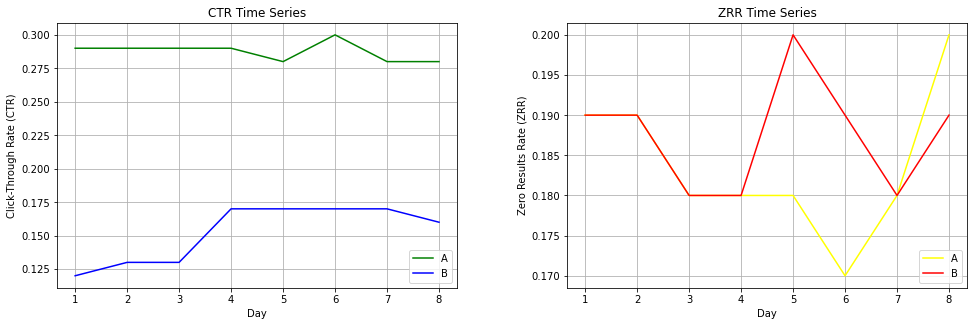

In [38]:
plt.subplot(1, 2, 1)
dfplot['CTR_A'].plot(figsize=(15,6),label='A', color='green')
dfplot['CTR_B'].plot(figsize=(15,6),label='B', color='blue')
plt.xlabel('Day')
plt.ylabel('Click-Through Rate (CTR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('CTR Time Series')

plt.subplot(1, 2, 2);
dfplot['ZRR_A'].plot(figsize=(15,6),label='A', color='yellow');
dfplot['ZRR_B'].plot(figsize=(15,6),label='B', color='red');
plt.xlabel('Day')
plt.ylabel('Zero Results Rate (ZRR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('ZRR Time Series')

plt.tight_layout(+6);

 

**Task 1 and 3 answer:** As I suggested before, even though variate B had a slightly higher traffic, yet the number of value counts of A was twice as many as B, which denoted a higher user interaction. Now, as we look at the data in CTR time series, it is clear that the winner is A. That means whatever changing that we made for example in our wesite, for the case of A was effective and made users to interact more.

When it comes to ZRR, there is no colclusion, we cannot say A had yielded less zero searches only because in day 5 and 6 ZRR is lower. As you can see, in day 8, it is A ZRR which is higher.

Another point is that on holidays CTR is higher in both A and B. This is the case in many websites particularly those who offers a service or product.The reason is intuitive and that is individuals have more time browsing websites compared to weekdays. The mroe you have time the more you are willing to 'Click-Through.'

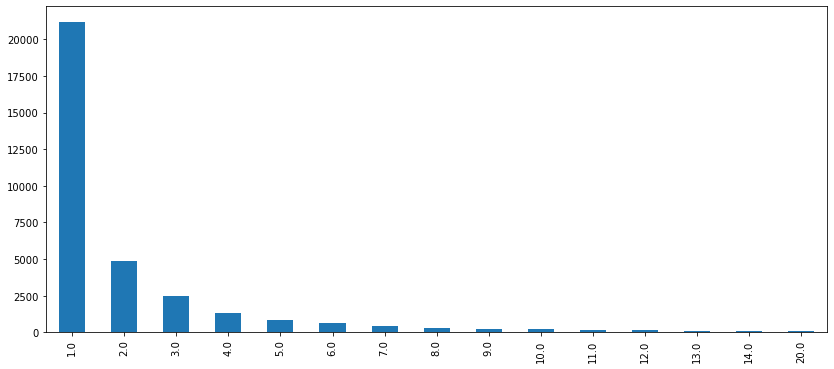

In [39]:
# Task2: Which results do people tend to try first? How does it change day-to-day?

df.loc[(df['action'] == 'visitPage') & (df['result_position'].notnull())]['result_position'].value_counts().loc[lambda x : x>90].plot(kind='bar', figsize=(14,6), xlim=(0,10));

Top 5 in day 1(%):
1.0    63.26
2.0    15.15
3.0    6.79 
4.0    3.98 
5.0    2.56 
Name: result_position, dtype: float64


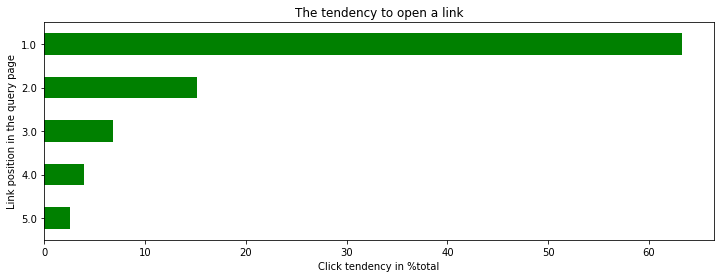

Top 5 in day 2(%):
1.0    62.16
2.0    13.93
3.0    7.84 
4.0    4.26 
5.0    2.60 
Name: result_position, dtype: float64


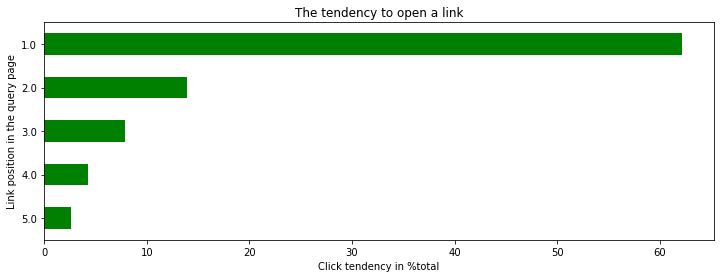

Top 5 in day 3(%):
1.0    62.46
2.0    13.99
3.0    7.45 
4.0    3.64 
5.0    2.41 
Name: result_position, dtype: float64


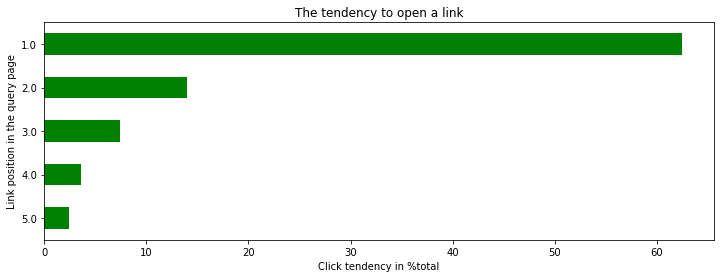

Top 5 in day 4(%):
1.0    64.33
2.0    14.45
3.0    6.90 
4.0    4.17 
5.0    2.35 
Name: result_position, dtype: float64


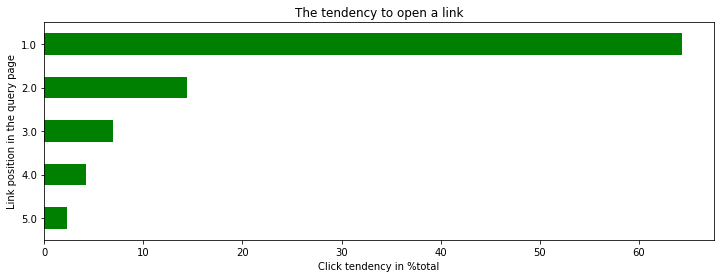

Top 5 in day 5(%):
1.0    61.89
2.0    15.43
3.0    7.26 
4.0    3.93 
5.0    2.48 
Name: result_position, dtype: float64


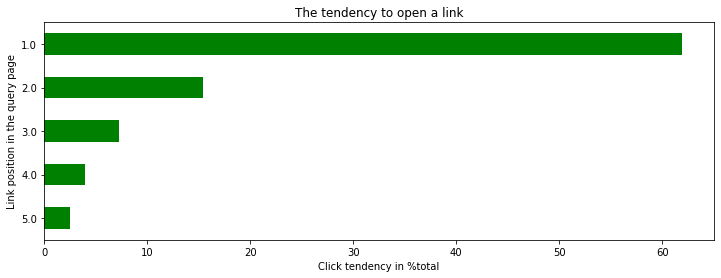

Top 5 in day 6(%):
1.0    62.63
2.0    14.53
3.0    7.59 
4.0    4.19 
5.0    2.40 
Name: result_position, dtype: float64


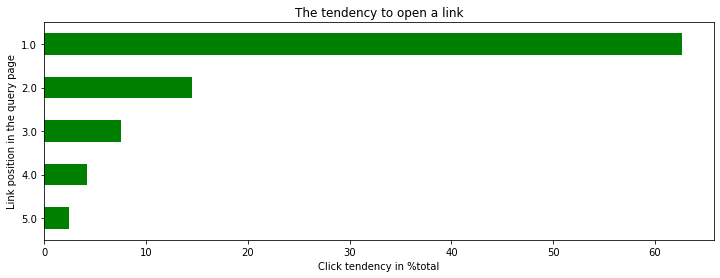

Top 5 in day 7(%):
1.0    62.90
2.0    13.73
3.0    7.56 
4.0    4.09 
5.0    2.45 
Name: result_position, dtype: float64


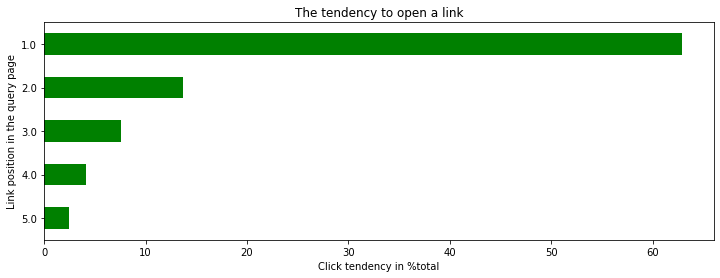

Top 5 in day 8(%):
1.0    61.99
2.0    13.88
3.0    7.14 
4.0    3.88 
5.0    2.77 
Name: result_position, dtype: float64


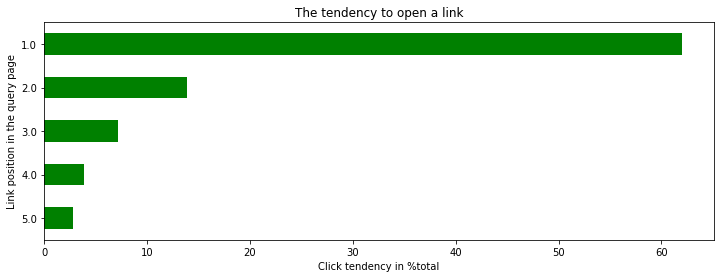

In [40]:
# Task2: Which results do people tend to try first? How does it change day-to-day?

df['day'] = df['timestamp'].dt.day

for day in range(min(df['day']),max(df['day'])+1):
    print('Top 5 in day ',day,'(%):\n',round(df.loc[((df['action'] == 'visitPage') & (df['result_position'].notnull())) & (df['day'] == day) ]['result_position'].value_counts(normalize=True, ascending=False)[:5]*100,2), sep = '')
    (df.loc[((df['action'] == 'visitPage') & (df['result_position'].notnull())) & (df['day'] == day) ]['result_position'].value_counts(normalize=True, ascending=True)*100)[5:].plot(kind='barh', figsize=(12,4), color='green');
    plt.xlabel('Click tendency in %total')
    plt.ylabel('Link position in the query page')
    plt.title('The tendency to open a link')
    plt.show()
    ;

**Task 2 answer:** People are tend to be lazy! We prefer to choose the first link with a great diffrence and then the rest of the query until around 10 to 15 positions when the tendency slightly goes to the last one which was evidently 20. Note that from page second we witness a great drop in intrest.

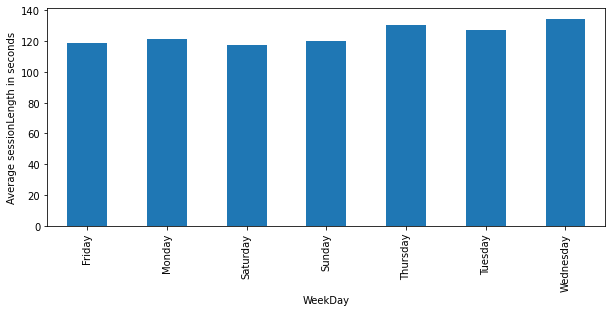

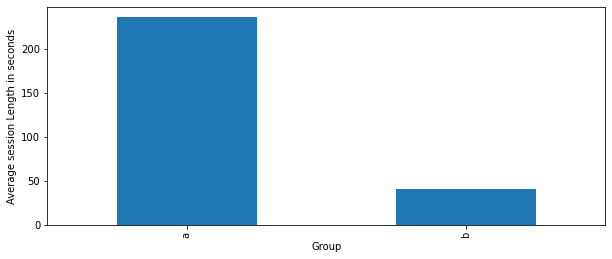

In [41]:
# Task4: Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.
# I believe when it is possible visualization tools are far better than Python to answer this task, however for the sake of exam
# I will draw some features' relation with SessionLength
# We can use mutual information and correlation in order to know which parameter affects SessionLength most. 

dfresult.groupby(['WeekDay'])['SessionLength'].mean().plot(kind = 'bar', x='WeekDay', y='SessionLength', figsize=(10,4));
plt.ylabel('Average sessionLength in seconds')
plt.show()

dfresult.groupby(['Group'])['SessionLength'].mean().plot(kind = 'bar', x='Group', y='SessionLength', figsize=(10,4));
plt.ylabel('Average session Length in seconds')
plt.show()

In [48]:
# Mutual information complete table
mi= pd.DataFrame({'Feature': range(len(dfresult.columns)),'Score': range(len(dfresult.columns))}, columns=['Feature', 'Score'])
mi['Feature'] = np.nan
mi['Score'] = np.nan
i=0
for feature in dfresult.columns:
    score = round(sklearn.metrics.mutual_info_score(dfresult['SessionLength'], dfresult[feature]), 2)
    mi.at[i,'Score'] = score
    mi['Feature'][i] = feature
    i=i+1
mi.sort_values(by = 'Score', ascending = False)



,Feature,Score
0,SessionId,4.24
3,SessionLength,4.24
6,CheckInTimeTotal,0.99
7,SERPTotal,0.67
11,CTR,0.53
10,QueryTotal,0.52
5,VisitPageTotal,0.45
8,FirstClick,0.43
4,Group,0.37
12,ZRR,0.23


In [49]:
dfresult.corr()

,Day,SessionLength,VisitPageTotal,CheckInTimeTotal,SERPTotal,FirstClick,ZeroSearch,QueryTotal,CTR,ZRR
Day,1.000000,-0.022740,-0.077917,-0.040525,-0.004142,0.000006,-0.000646,-0.002689,0.004180,0.004971
SessionLength,-0.022740,1.000000,0.491556,0.652303,0.424985,0.523210,0.204659,0.504600,0.305039,-0.085043
VisitPageTotal,-0.077917,0.491556,1.000000,0.511926,0.393237,0.882659,-0.017278,0.332735,0.542678,-0.170535
CheckInTimeTotal,-0.040525,0.652303,0.511926,1.000000,0.165094,0.517743,-0.049701,0.107729,0.547537,-0.159659
SERPTotal,-0.004142,0.424985,0.393237,0.165094,1.000000,0.457973,0.037984,0.635644,0.026310,-0.213314
FirstClick,0.000006,0.523210,0.882659,0.517743,0.457973,1.000000,-0.009336,0.396058,0.574314,-0.180262
ZeroSearch,-0.000646,0.204659,-0.017278,-0.049701,0.037984,-0.009336,1.000000,0.655733,-0.142848,0.454933
QueryTotal,-0.002689,0.504600,0.332735,0.107729,0.635644,0.396058,0.655733,1.000000,-0.080083,0.060164
CTR,0.004180,0.305039,0.542678,0.547537,0.026310,0.574314,-0.142848,-0.080083,1.000000,-0.288135
ZRR,0.004971,-0.085043,-0.170535,-0.159659,-0.213314,-0.180262,0.454933,0.060164,-0.288135,1.000000


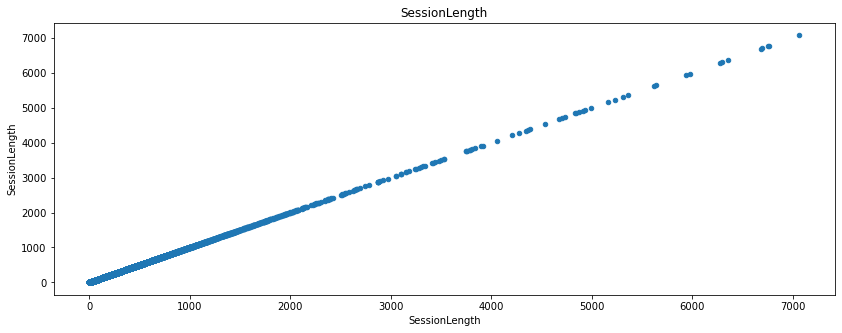

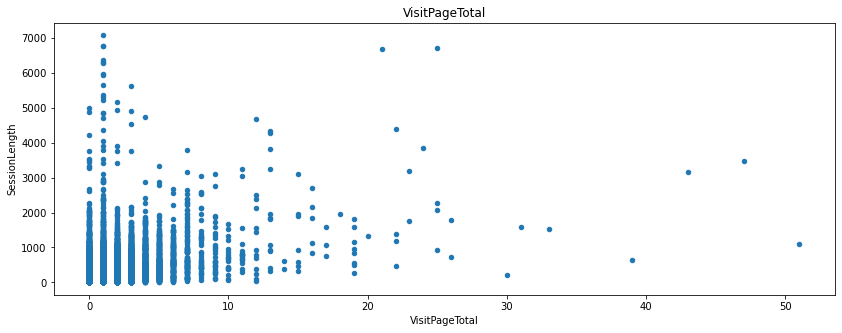

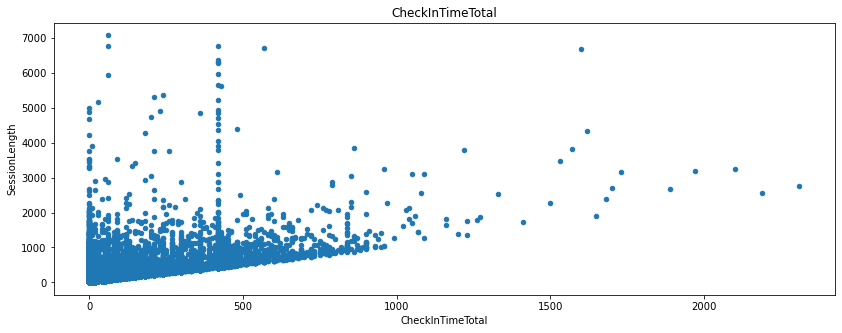

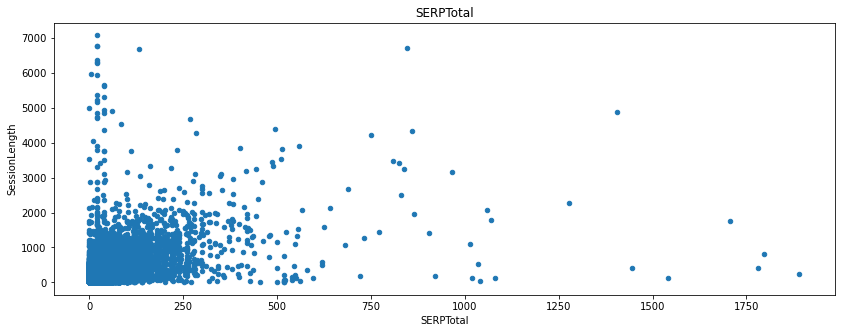

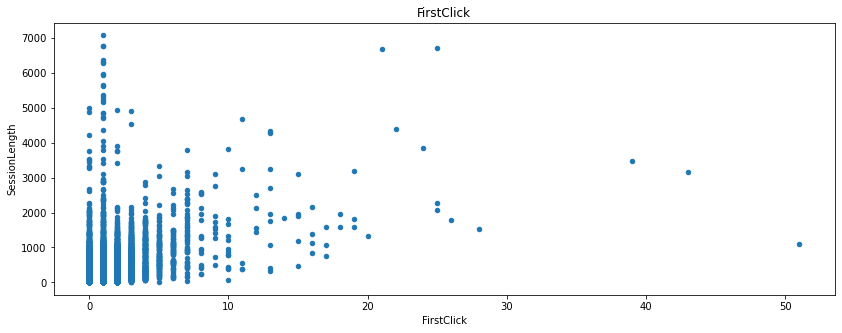

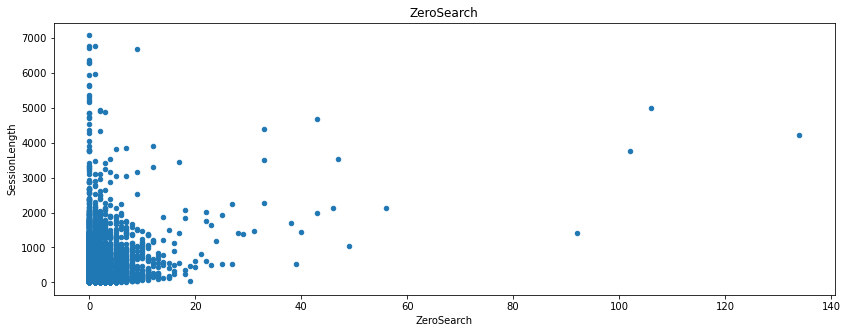

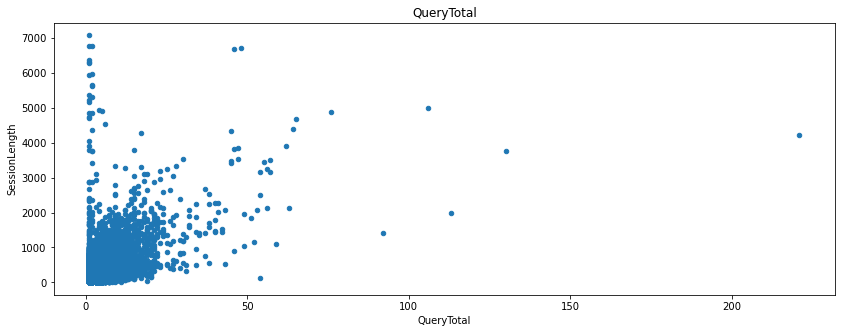

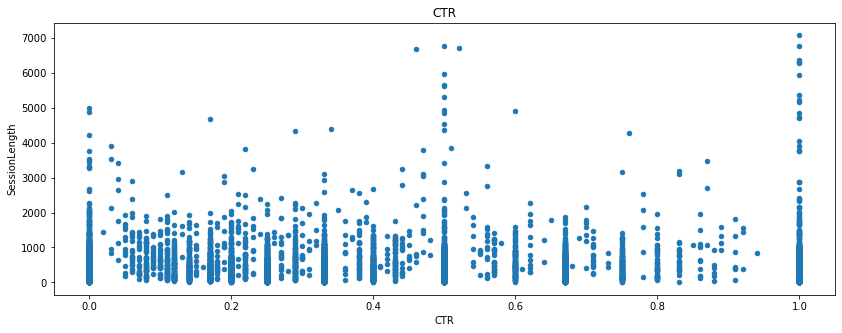

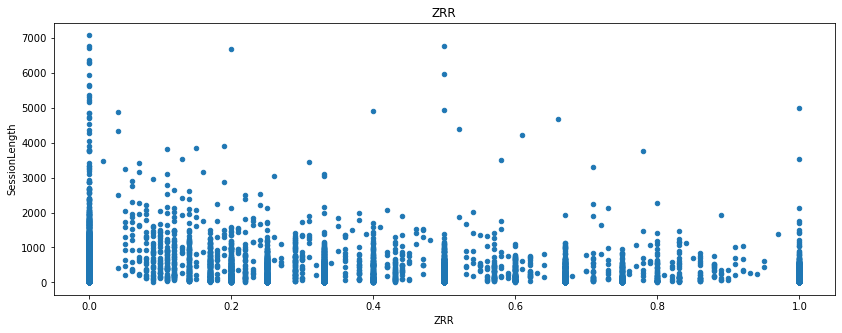

In [50]:
# features defined for plotting 
output = "SessionLength"
numerical_features = [feature for feature in dfresult.columns if dfresult[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in numerical_features if len(dfresult[feature].unique())<25 and feature not in year_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]

# Numeric-Continous feature: scatter
for feature in continuous_feature:
    dfresult.plot(kind='scatter', x=feature, y=output, figsize=(14,5))
    plt.title(feature)
    plt.show()

**Task 4 answer:** Considering the tables and charts, some intresting points to mention are as follows:
1- CTR is higher during the weekend but average SessionLength is lower, which means individuals spend less time but with more interaction with the website.

2- Group A had spend 4 times as much as Group B in the website with higher CTR rate even though the distribution traffic to A was even a bit higher than A.

3- CheckInTime/FirstClick/VisitPageTotal: With a medium correlation, the more visitors spend time in the website, the more possibility they click on the results at query page and spend time visiting different pages of the website.

4- SERPTotal: Here, also we can see a small correlation. However, correlation is not the causation: the more session length is the more users interact with the website, thus increasing the possibility of higher number of search results.

**Task 5 answer: Executive Summary:** The above task is the analysis of the result of an A/B variate test performed in the first 8 days of March 2016 with around 57% traffic distributed to B variate and 43% to A.

The result of the above analysis reveals that variate A in all 8 days absorbs more interactions from users, based on Click-Through Rate (CTR), despite having been recieved slightely less traffic. However, the results are not conclusive as for Zero Results Rate (ZRR) since the rate is turbulant not providing adequete data to conclude.

CTR is sparsely higher in the weekends though SessionLenghth, which is the time differences between start and end of a session, is lower in the same period. Also, variate A had kept customers in the website 4 times as many as variate B.

Moreover, around 64% of customers tended to click merely on the first result regardless of the day and variates.

Finally, the more the search engine returns hits for the user, the higher chance the visitor stays at the website thus opening new pages and staying in the website. As a result, the optimization of website's search engine seems to be key factor to increase and retain our customers.